<a href="https://colab.research.google.com/github/aparna667/Parameter_optimization_SVM/blob/main/Untitled27.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import pandas as pd
from sklearn.svm import NuSVC
import numpy as np
import random 
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
df=pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/letter-recognition/letter-recognition.data")
samples = []
for i in range(10):
    data = df.sample(1999,random_state=i*10)
    samples.append(data)


In [16]:
kernels=['linear','rbf','poly','sigmoid']
bestkernel=[]
bestnu=[]
bestaccuracy=[]
bestepsilon=[]
acc=[]

def calc_accuracy(kern,value_nu,X_train,X_test,y_train,y_test):
    clf = NuSVC(nu=value_nu,kernel=kern,tol=eps)
    clf.fit(X_train,y_train)
    y_predict=clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_predict)*100
    return accuracy

##Finding best parameter for each sample
for i in range(len(samples)):
    X=samples[i].loc[:,samples[i].columns!='T']
    y=samples[i]['T']
    maxac=-9999
    bestkern=''
    bestn=0
    bestepsil=0
    acculist=[]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)
    for k in range(500):
        kern=random.choice(kernels)
        value_nu=random.uniform(0,0.1)
        eps=random.uniform(0,1)
        try:
            accu=calc_accuracy(kern,value_nu,X_train,X_test,y_train,y_test)
        except:
            k=k-1    
        acculist.append(accu)
        if(accu>maxac):
            maxac=accu
            bestkern=kern
            bestn=value_nu
            bestepsil=eps
    bestkernel.append(bestkern)
    bestnu.append(bestn)
    bestaccuracy.append(maxac)
    acc.append(acculist)
    bestepsilon.append(bestepsil)

In [17]:
samplename=['Sample 1','Sample 2','Sample 3','Sample 4','Sample 5','Sample 6','Sample 7','Sample 8','Sample 9','Sample 10']
tabledata={'Sample#':samplename,'Best Accuracy':bestaccuracy,'Best kernel':bestkernel,'Best nu':bestnu,'Best Epsilon':bestepsilon}
table=pd.DataFrame(tabledata)
table


,Sample#,Best Accuracy,Best kernel,Best nu,Best Epsilon
0,Sample 1,86.000000,rbf,0.075295,0.018110
1,Sample 2,87.000000,rbf,0.071482,0.003225
2,Sample 3,85.666667,rbf,0.095180,0.057950
3,Sample 4,86.166667,rbf,0.099799,0.010870
4,Sample 5,83.000000,rbf,0.088705,0.004492
5,Sample 6,85.833333,rbf,0.060161,0.013667
6,Sample 7,87.166667,rbf,0.050774,0.003851
7,Sample 8,86.833333,rbf,0.049965,0.001735
8,Sample 9,85.333333,rbf,0.035647,0.006800
9,Sample 10,88.666667,rbf,0.088721,0.001003


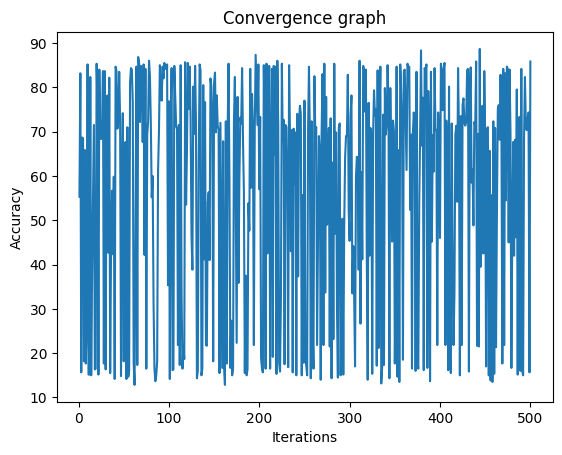

In [23]:
maxindex = table['Best Accuracy'].idxmax()
itr=list(range(1, 501))
plt.plot(itr,acc[maxindex])
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.title('Convergence graph')
plt.show()